In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
df.head()
df.value_counts('genres')

genres
Drama                                                                                       1887
Comedy                                                                                      1263
Comedy, Drama                                                                                863
Drama, Mystery & Suspense                                                                    731
Art House & International, Drama                                                             589
                                                                                            ... 
Classics, Documentary, Special Interest                                                        1
Classics, Documentary, Sports & Fitness                                                        1
Action & Adventure, Art House & International, Classics, Mystery & Suspense                    1
Classics, Drama, Horror, Musical & Performing Arts, Mystery & Suspense, Special Interest       1
Art House & Internation

In [6]:
df_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
df_budgets = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [8]:
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('$', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('$', '')
df_budgets['production_budget'] = df_budgets['production_budget'].str.replace(',', '')
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace(',', '')
df_budgets

<ipython-input-8-aac78b677db0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_budgets['production_budget'] = df_budgets['production_budget'].str.replace('$', '')
<ipython-input-8-aac78b677db0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_budgets['domestic_gross'] = df_budgets['domestic_gross'].str.replace('$', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,$0
5778,79,"Apr 2, 1999",Following,6000,48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,$0


In [9]:
df_budgets[['domestic_gross', 'production_budget']] = df_budgets[['domestic_gross', 'production_budget']].apply(pd.to_numeric)
df_budgets = df_budgets.drop(columns="worldwide_gross")
df_budgets

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0
5778,79,"Apr 2, 1999",Following,6000,48482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0


In [10]:
df_budgets["profit"] = df_budgets["domestic_gross"] - df_budgets["production_budget"]
df_budgets

,id,release_date,movie,production_budget,domestic_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,335507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,-169536125
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,-307237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,128405868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,303181382
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,42482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,-1400


In [11]:
merged = pd.merge(df, df_gross, left_on='movie_title', right_on='title')
df_rating_genres = merged[['movie_title','genres', 'tomatometer_rating', 'domestic_gross']].copy()
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


In [12]:
df_rating_genres.movie_title.sort_values().head(180)
                                    

140                           '71
12         1,000 Times Good Night
76            10 Cloverfield Lane
77                       10 Years
35                     1001 Grams
                  ...            
279                        Aurora
280                    Austenland
281    Author: The JT LeRoy Story
282       Avengers: Age of Ultron
283        Avengers: Infinity War
Name: movie_title, Length: 180, dtype: object

In [13]:
df_rating_genres.dropna(inplace=True)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
1,Going the Distance,Comedy,0.0,17800000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
3,The Silence,"Action & Adventure, Drama, Mystery & Suspense,...",50.0,100000.0
4,The Silence,"Art House & International, Drama, Mystery & Su...",88.0,100000.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


In [14]:
df_rating_genres.drop_duplicates(subset='movie_title', keep='last' , inplace=True)
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,"Comedy, Romance",54.0,17800000.0
5,The Silence,"Horror, Mystery & Suspense",30.0,100000.0
7,Gone,Mystery & Suspense,12.0,11700000.0
8,Fireflies in the Garden,Drama,22.0,70600.0
...,...,...,...,...
2144,Zindagi Na Milegi Dobara,"Art House & International, Comedy, Drama",92.0,3100000.0
2145,Zombeavers,"Action & Adventure, Comedy, Horror",69.0,14900.0
2146,Zookeeper,"Comedy, Romance",14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0


In [15]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.split(',', expand = False)

In [16]:
df_rating_genres = df_rating_genres.explode('genres')
df_rating_genres

,movie_title,genres,tomatometer_rating,domestic_gross
0,Please Give,Comedy,87.0,4000000.0
2,Going the Distance,Comedy,54.0,17800000.0
2,Going the Distance,Romance,54.0,17800000.0
5,The Silence,Horror,30.0,100000.0
5,The Silence,Mystery & Suspense,30.0,100000.0
...,...,...,...,...
2146,Zookeeper,Romance,14.0,80400000.0
2147,Zoolander 2,Comedy,22.0,28800000.0
2148,Zootopia,Action & Adventure,98.0,341300000.0
2148,Zootopia,Animation,98.0,341300000.0


In [17]:
df_rating_genres['genres'] = df_rating_genres['genres'].str.strip()

In [18]:
merged = pd.merge(df_rating_genres, df_budgets, left_on='movie_title', right_on='movie')
df_production = merged[['movie', 'genres', 'production_budget']].copy()
df_production

,movie,genres,production_budget
0,Please Give,Comedy,3000000
1,Going the Distance,Comedy,32000000
2,Going the Distance,Romance,32000000
3,Fireflies in the Garden,Drama,8000000
4,Priest,Action & Adventure,60000000
...,...,...,...
2319,Zookeeper,Romance,80000000
2320,Zoolander 2,Comedy,50000000
2321,Zootopia,Action & Adventure,150000000
2322,Zootopia,Animation,150000000


In [19]:
df_sorted = df_production.sort_values('production_budget', ascending=False)
df_sorted

,movie,genres,production_budget
1347,Pirates of the Caribbean: On Stranger Tides,Comedy,410600000
1346,Pirates of the Caribbean: On Stranger Tides,Action & Adventure,410600000
1348,Pirates of the Caribbean: On Stranger Tides,Science Fiction & Fantasy,410600000
320,Avengers: Age of Ultron,Science Fiction & Fantasy,330600000
319,Avengers: Age of Ultron,Action & Adventure,330600000
...,...,...,...
2307,Your Sister's Sister,Comedy,120000
172,A Ghost Story,Drama,100000
1853,The Gallows,Mystery & Suspense,100000
1852,The Gallows,Horror,100000


In [20]:
df_comedy = df_sorted.loc[df_sorted['genres'] == 'Comedy']
df_romance = df_sorted.loc[df_sorted['genres'] == 'Romance']
df_horror = df_sorted.loc[df_sorted['genres'] == 'Horror']
df_mystery_suspence = df_sorted.loc[df_sorted['genres'] == 'Mystery & Suspense']
df_action_adventure = df_sorted.loc[df_sorted['genres'] == 'Action & Adventure']
df_animation = df_sorted.loc[df_sorted['genres'] == 'Animation']
df_art = df_sorted.loc[df_sorted['genres'] == 'Art House & International']
df_drama = df_sorted.loc[df_sorted['genres'] == 'Drama']

In [21]:
y_comedy = round(df_comedy['production_budget'].mean())
y_drama = round(df_drama['production_budget'].mean())
y_romance = round(df_romance['production_budget'].mean())
y_horror = round(df_horror['production_budget'].mean())
y_mystery = round(df_mystery_suspence['production_budget'].mean())
y_action_adventure = round(df_action_adventure['production_budget'].mean())
y_animation = round(df_animation['production_budget'].mean())
y_art = round(df_art['production_budget'].mean())

In [30]:
y_comedy

41058295

<ipython-input-57-409ff60c979e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_two_ax.set_xticklabels(plot_two_ax.get_xticks())


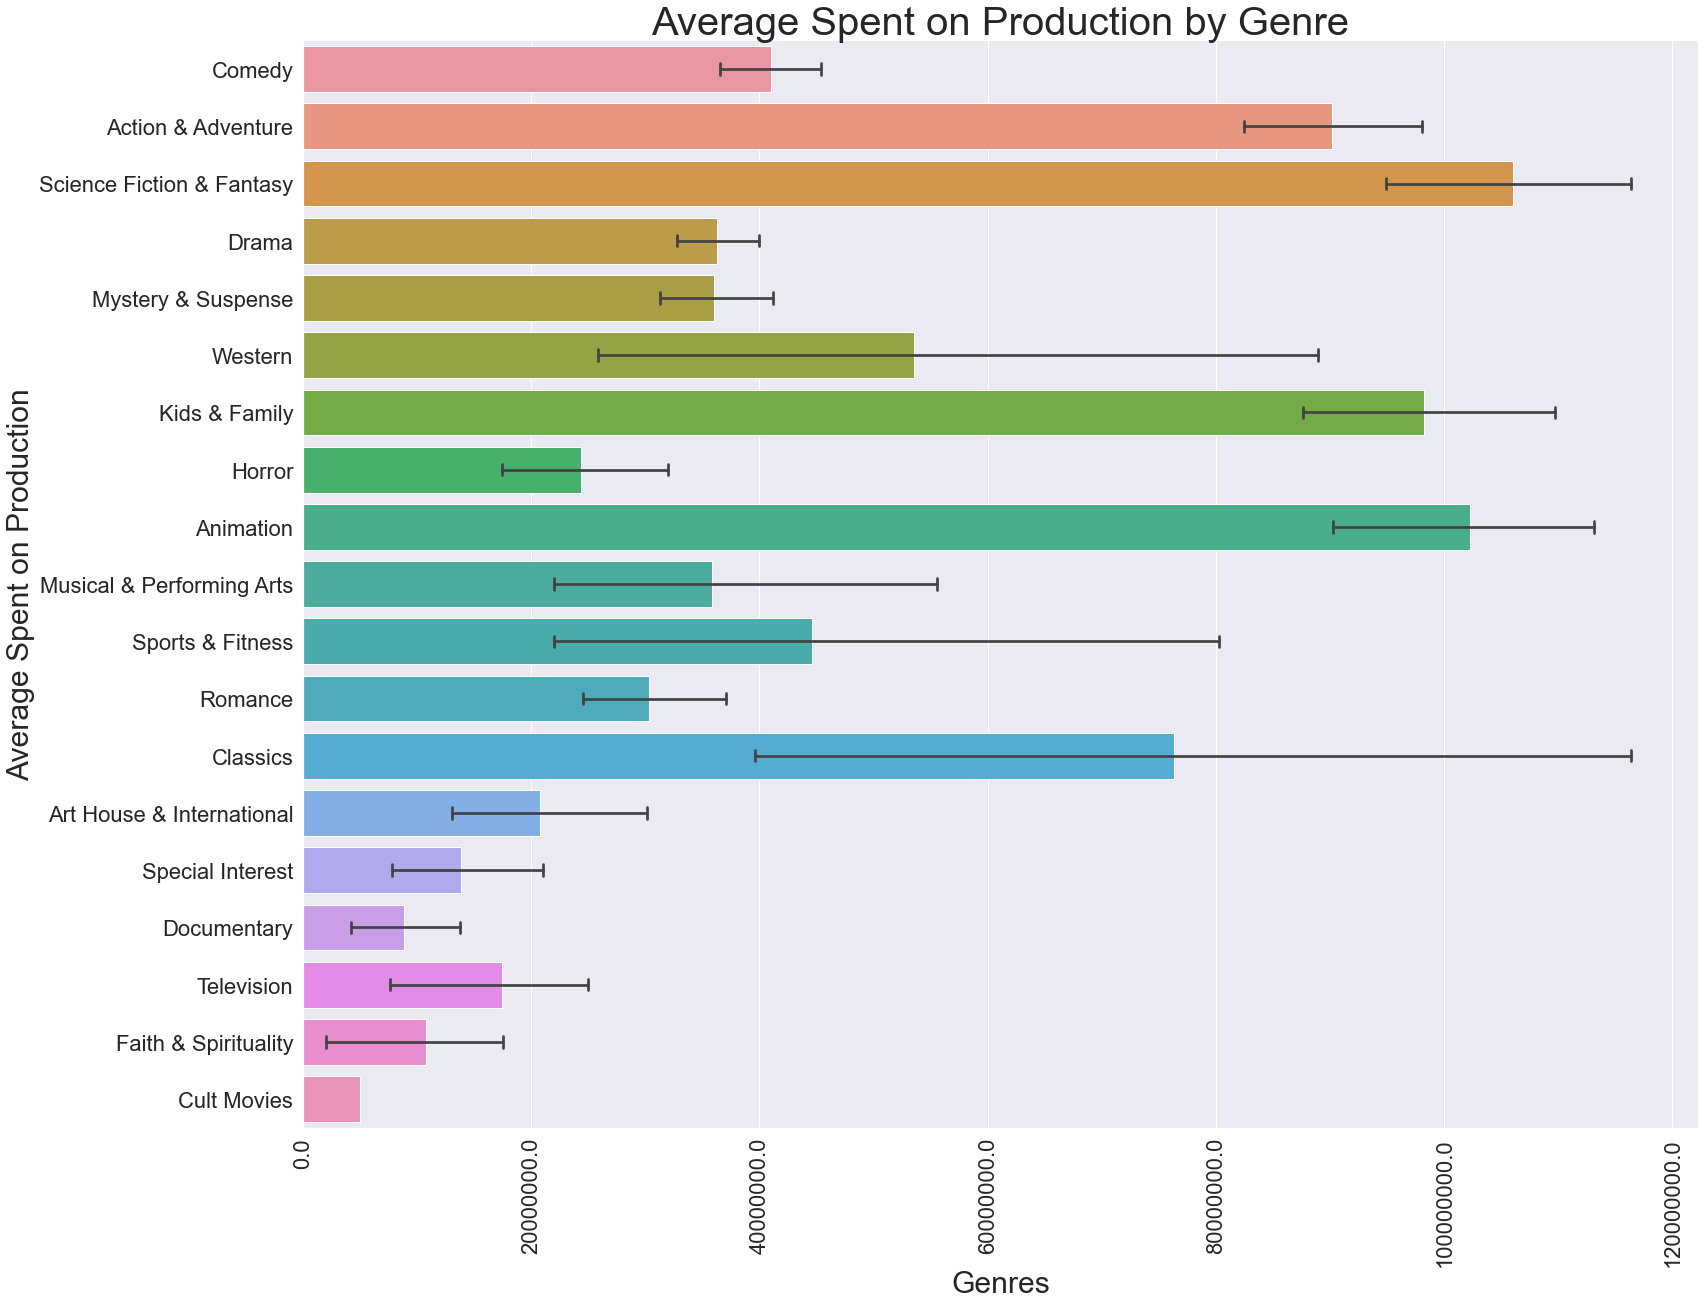

In [57]:
plot_fig_two, plot_two_ax = plt.subplots(figsize=(25, 20))

sns.barplot(x='production_budget', y='genres', data=df_sorted, capsize=.2)

plot_two_ax.set_xlabel('Genres', fontsize=30)
plot_two_ax.set_ylabel('Average Spent on Production', fontsize=30)
plot_two_ax.set_title('Average Spent on Production by Genre', fontsize=40)
plot_two_ax.set_xticklabels(plot_two_ax.get_xticks())

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.savefig('average_production.png');